<a href="https://colab.research.google.com/github/shwetadbhujbal/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_classification(n_samples=1500, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=5)

In [3]:
X.shape

(1500, 2)

In [4]:
y.shape

(1500,)

In [5]:
y= y.reshape(-1,1)
y.shape

(1500, 1)

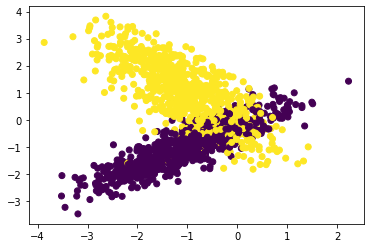

In [6]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [7]:
ones = np.ones((len(X), 1))
X_new = np.hstack((ones, X))

In [8]:
X_new.shape

(1500, 3)

In [9]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def predict(X, weight):
  y_hat = sigmoid(np.dot(X, weight))
  return y_hat

In [10]:
def logLoss(X,y,weight):
  y_hat = predict(X, weight)
  loss = ((y * np.log(y_hat)) + ((1-y) * np.log(1-y_hat)))
  return -loss.mean()

In [11]:
def gradient(X, y, weight):
  y_hat = predict(X, weight)
  grad = np.dot(X.T, (y_hat - y))
  return grad/len(X)

In [12]:
def gradient_descent(X, y, learning_rate = 0.1, epochs = 100):
  weight = np.random.rand(X.shape[1], 1)
  error_list = []
  for i in range(epochs):
    loss = logLoss(X, y, weight)
    error_list.append(loss)
    grad = gradient(X, y, weight)
    weight = weight - learning_rate * grad

  return weight.round(3), error_list

In [13]:
opt_weights_1, loss =  gradient_descent(X_new, y, epochs=200)

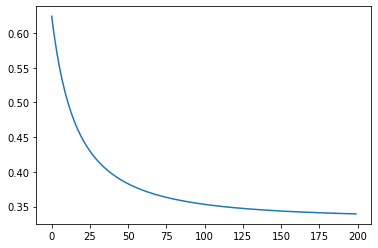

In [14]:
plt.plot(loss)

In [15]:
opt_weights_1

array([[0.373],
       [0.15 ],
       [1.885]])

In [16]:
Y_hat = predict(X_new, opt_weights_1)
Y_hat[:5]

array([[0.99316384],
       [0.07183531],
       [0.00933607],
       [0.93401198],
       [0.06778121]])

In [17]:
predictions = Y_hat.round().astype('int')
predictions[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [18]:
(y==predictions).mean()*100

85.13333333333334

In [19]:
# Let's try by increasing learning_rate

opt_weights_2, loss =  gradient_descent(X_new, y, epochs=300, learning_rate = 0.5)

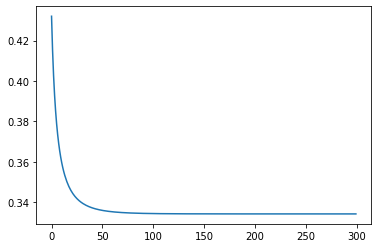

In [20]:
plt.plot(loss)

In [21]:
loss

[0.43208470611377137,
 0.4152392872517928,
 0.4026022765058477,
 0.39280731727028834,
 0.38501882761146344,
 0.37869787170623065,
 0.3734814651977702,
 0.36911627566066874,
 0.36542018123373615,
 0.362258938491739,
 0.35953145903802913,
 0.3571602033861785,
 0.35508473017975356,
 0.3532572539916508,
 0.35163951791753273,
 0.35020054828904823,
 0.34891501431653643,
 0.34776201077173663,
 0.34672414176322425,
 0.34578682224602836,
 0.3449377392760282,
 0.3441664320188591,
 0.3434639611132486,
 0.34282264601765555,
 0.34223585461283257,
 0.3416978333538319,
 0.34120356916553823,
 0.34074867639249806,
 0.34032930367513037,
 0.3399420567876601,
 0.3395839343479319,
 0.33925227397296687,
 0.3389447069618085,
 0.3386591199785708,
 0.33839362251250527,
 0.33814651912952,
 0.33791628571658733,
 0.3377015490685574,
 0.3375010692848394,
 0.337313724537883,
 0.3371384978514526,
 0.3369744655882453,
 0.3368207873964516,
 0.3366766974057464,
 0.336541496496741,
 0.3364145454955634,
 0.33629525916809

In [22]:
opt_weights_2

array([[ 0.218],
       [-0.156],
       [ 2.221]])

In [23]:
Y_hat = predict(X_new, opt_weights_2)
Y_hat[:5]

array([[0.9981683 ],
       [0.06209343],
       [0.00924971],
       [0.9642523 ],
       [0.04687168]])

In [24]:
predictions = Y_hat.round().astype('int')
predictions[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [25]:
y[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [26]:
# Let's check performance
(y==predictions).mean()*100

85.53333333333333